In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('D:\Code\Python\SLC_Class\ADMN5016Ai\Train.csv')
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


# Preprocessing / Cleaning Data

In [4]:
print(train.isnull().sum())

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64


In [5]:
# This filters out rows with 2 or more null values // keeps rows with (Dimension-2) or more non-null values.
train = train.dropna(thresh=train.shape[1]-2)
# drop ID column
train=train.drop('ID', 1)
print(train.isnull().sum())

Gender               0
Ever_Married       134
Age                  0
Graduated           72
Profession         113
Work_Experience    813
Spending_Score       0
Family_Size        320
Var_1               72
Segmentation         0
dtype: int64


C:\Users\SXH\AppData\Local\Temp\ipykernel_892\2469066080.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train=train.drop('ID', 1)


In [6]:
# obtainign the categroical columns
catcols = []
for i in train.columns:
  if train[i].dtype == "object":
      catcols.append(i)
catcols 

['Gender',
 'Ever_Married',
 'Graduated',
 'Profession',
 'Spending_Score',
 'Var_1',
 'Segmentation']

In [7]:
#Replacing the missing values in the categorical variables as "not_available"
train[catcols[:-1]] = train[catcols[:-1]].fillna("not_available")
print(train.isnull().sum())

Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession           0
Work_Experience    813
Spending_Score       0
Family_Size        320
Var_1                0
Segmentation         0
dtype: int64


Median value of Family size feature is: 1.0


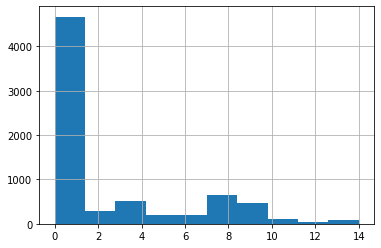

In [8]:
train['Work_Experience'].hist()
print("Median value of Family size feature is:",train['Work_Experience'].median())

Median value of Family size feature is: 3.0


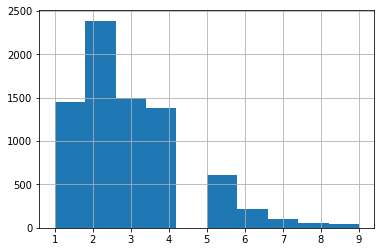

In [9]:
train['Family_Size'].hist()
print("Median value of Family size feature is:",train['Family_Size'].median())

In [10]:
train['Work_Experience']=train['Work_Experience'].fillna(train['Work_Experience'].median())
train['Family_Size']=train['Family_Size'].fillna(train['Family_Size'].median())
print(train.isnull().sum())

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64


In [11]:
train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A


# Code the categorical Columns

In [12]:
# Set numerical references
gender_map = {'Male': 0,'Female': 1}
marriage_map = {'not_available': 99, 'No': 0, 'Yes': 1}
graduate_map = {'not_available': 99, 'No': 0, 'Yes': 1}
profession_map = {'Artist': 0,'Doctor': 1,'Engineer': 2,'Entertainment': 3,'Executive': 4,'Healthcare': 5,
                   'Homemaker': 6,'Lawyer': 7,'Marketing': 8,'not_available': 99}
spending_map = {'Average': 1, 'High': 2, 'Low': 0}
var_map = {'Cat_1': 1,'Cat_2': 2,'Cat_3': 3,'Cat_4': 4,'Cat_5': 5, 'Cat_6': 6, 'Cat_7': 7,'not_available': 99}
target_map = {'A': 0, 'B': 1, 'C': 2, 'D': 3}

In [13]:
# Map the references
le = LabelEncoder()
train["Gender"] =  train["Gender"].map(gender_map)
train["Ever_Married"] =  train["Ever_Married"].map(marriage_map)
train["Graduated"] =  train["Graduated"].map(graduate_map)
train["Profession"] =  train["Profession"].map(profession_map)
train["Spending_Score"] =  train["Spending_Score"].map(spending_map)
train["Var_1"] =  train["Var_1"].map(var_map)
train["Segmentation"] =  train["Segmentation"].map(target_map)

In [14]:
train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,0,22,0,5,1.0,0,4.0,4,3
1,1,1,38,1,2,1.0,1,3.0,4,0
2,1,1,67,1,2,1.0,0,1.0,6,1
3,0,1,67,1,7,0.0,2,2.0,6,1
4,1,1,40,1,3,1.0,2,6.0,6,0


# Test data

In [15]:
test = pd.read_csv('D:\Code\Python\SLC_Class\ADMN5016Ai\Test.csv')
test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [16]:
print(test.isnull().sum())

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
Segmentation         0
dtype: int64


In [17]:
test = test.dropna(thresh=train.shape[1]-2)
#drop ID column
test=test.drop('ID', 1)
print(test.isnull().sum())

Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
Segmentation         0
dtype: int64


C:\Users\SXH\AppData\Local\Temp\ipykernel_892\2690682041.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test=test.drop('ID', 1)


In [18]:
#obtainign the categroical columns alone
catcolsTest = []
for i in test.columns:
  if test[i].dtype == "object":
      catcolsTest.append(i)
catcolsTest 

['Gender',
 'Ever_Married',
 'Graduated',
 'Profession',
 'Spending_Score',
 'Var_1',
 'Segmentation']

In [19]:
#Replacing the missing values in the categorical variables as "not_available"
test[catcolsTest[:-1]] = test[catcolsTest[:-1]].fillna("not_available")
#Replace missing numerical value with median
test['Work_Experience']=test['Work_Experience'].fillna(test['Work_Experience'].median())
test['Family_Size']=test['Family_Size'].fillna(test['Family_Size'].median())
print(test.isnull().sum())

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64


In [20]:
test["Gender"] =  test["Gender"].map(gender_map)
test["Ever_Married"] =  test["Ever_Married"].map(marriage_map)
test["Graduated"] =  test["Graduated"].map(graduate_map)
test["Profession"] =  test["Profession"].map(profession_map)
test["Spending_Score"] =  test["Spending_Score"].map(spending_map)
test["Var_1"] =  test["Var_1"].map(var_map)
test["Segmentation"] =  test["Segmentation"].map(target_map)
test.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,1,36,1,2,0.0,0,1.0,6,1
1,0,1,37,1,5,8.0,1,4.0,6,0
2,1,1,69,0,99,0.0,0,1.0,6,0
3,0,1,59,0,4,11.0,2,2.0,6,1
4,1,0,19,0,8,1.0,0,4.0,6,0


# Model - Random Forest

In [21]:
X_train = train.iloc[0:len(train),0:9:]
y_train = train['Segmentation']
X_test=test.iloc[0:len(test),0:9:]
y_test=test['Segmentation']
y_train.info()
X_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 8049 entries, 0 to 8067
Series name: Segmentation
Non-Null Count  Dtype
--------------  -----
8049 non-null   int64
dtypes: int64(1)
memory usage: 125.8 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8049 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8049 non-null   int64  
 1   Ever_Married     8049 non-null   int64  
 2   Age              8049 non-null   int64  
 3   Graduated        8049 non-null   int64  
 4   Profession       8049 non-null   int64  
 5   Work_Experience  8049 non-null   float64
 6   Spending_Score   8049 non-null   int64  
 7   Family_Size      8049 non-null   float64
 8   Var_1            8049 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 628.8 KB


In [22]:
M_features=train.shape[1]
max_features=round(np.sqrt(M_features))-1
max_features

2

In [35]:
n_estimators = 20

In [36]:
model = RandomForestClassifier( max_features=max_features,n_estimators=n_estimators, random_state=0)
model.fit(X_train,y_train)

RandomForestClassifier(max_features=2, n_estimators=20, random_state=0)

In [37]:
def get_accuracy(X_train, X_test, y_train, y_test, model):
    return  {"test Accuracy":metrics.accuracy_score(y_test, model.predict(X_test)),"train Accuracy": metrics.accuracy_score(y_train, model.predict(X_train))}

In [38]:
print(get_accuracy(X_train, X_test, y_train, y_test, model)) 

{'test Accuracy': 0.3129044537495242, 'train Accuracy': 0.9468256926326252}


In [ ]:
plot_confusion_matrix

# Neural Network with 1 hidden layer

In [68]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
from torch.utils.data import Dataset, DataLoader

In [69]:
def plot_decision_regions_2class(model,data_set):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#00AAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#00AAFF'])
    X = data_set.x.numpy()
    y = data_set.y.numpy()
    h = .02
    x_min, x_max = X[:, 0].min() - 0.1 , X[:, 0].max() + 0.1 
    y_min, y_max = X[:, 1].min() - 0.1 , X[:, 1].max() + 0.1 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    XX = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])

    yhat = np.logical_not((model(XX)[:, 0] > 0.5).numpy()).reshape(xx.shape)
    plt.pcolormesh(xx, yy, yhat, cmap=cmap_light)
    plt.plot(X[y[:, 0] == 0, 0], X[y[:, 0] == 0, 1], 'o', label='y=0')
    plt.plot(X[y[:, 0] == 1, 0], X[y[:, 0] == 1, 1], 'ro', label='y=1')
    plt.title("decision region")
    plt.legend()

In [70]:
# Define the class Net with one hidden layer 

class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        #hidden layer 
        self.linear1 = nn.Linear(D_in, H)
        #output layer 
        self.linear2 = nn.Linear(H, D_out)

    # Prediction    
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))  
        x = torch.sigmoid(self.linear2(x))
        return x

In [71]:
modelNR = Net(2, 1, 1)


In [72]:
learning_rate = 0.001
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
train_loader = DataLoader(dataset=train, batch_size=1)
LOSS12 = train(train, model, criterion, train_loader, optimizer, epochs=500)

AttributeError: 'RandomForestClassifier' object has no attribute 'parameters'